In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps

In [2]:
IMG = '../../../img'

In [3]:
def plot(img, **kwargs):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, **kwargs)
    plt.show()

In [8]:
def plot_cv2(img):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [4]:
def plot_image(im1, im2, title1='Original', title2='New Image'):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(im1,cmap="gray")
    plt.title(title1)
    plt.subplot(1, 2, 2)
    plt.imshow(im2,cmap="gray")
    plt.title(title2)
    plt.show()

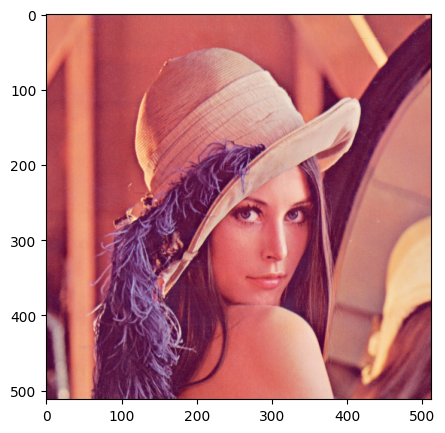

In [ ]:
image = Image.open(f'{IMG}/lenna.png')
plot(image)

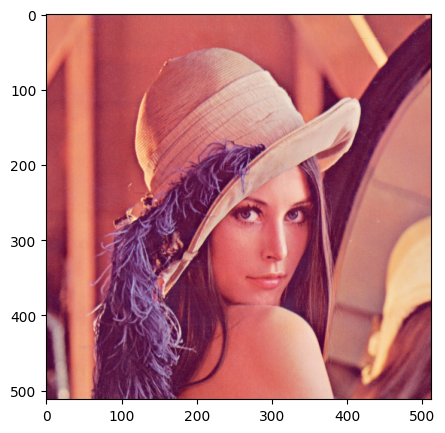

In [9]:
img = cv2.imread(f'{IMG}/lenna.png')
plot_cv2(img)

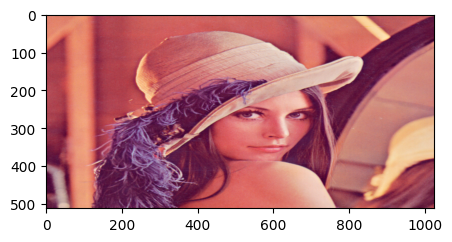

In [6]:
w, h = image.size
new_image = image.resize((2 * w, h))
plot(new_image)

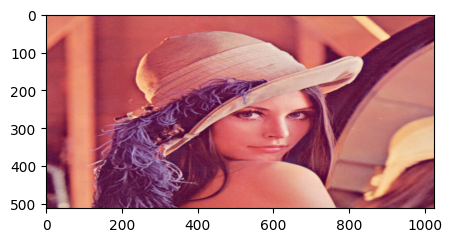

In [10]:
new_image = cv2.resize(
    img, None, fx=2, fy=1, interpolation=cv2.INTER_NEAREST)
plot_cv2(new_image);

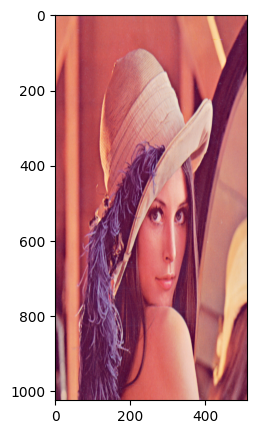

In [15]:
new_image = image.resize((w, 2 * h))
plot(new_image)

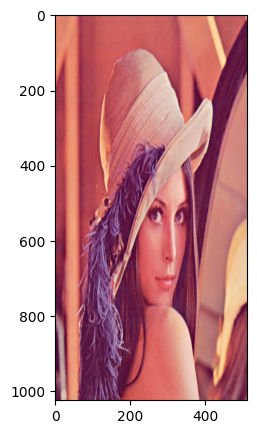

In [11]:
new_img = cv2.resize(
    img, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
# new_img = cv2.resize(img, (100, 200), interpolation=cv2.INTER_CUBIC)
plot_cv2(new_img)

In [12]:
tx = 100
ty = 10
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,  10.]], dtype=float32)

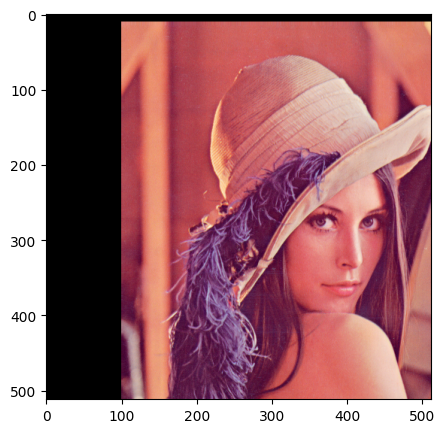

In [13]:
rows, cols, _ = img.shape
new_img = cv2.warpAffine(img, M, (cols, rows))
plot_cv2(new_img)

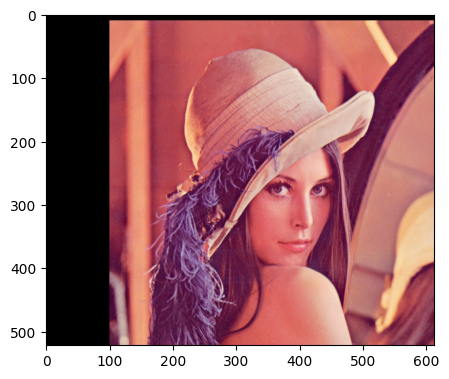

In [15]:
new_img = cv2.warpAffine(img, M, (cols + tx, rows + ty))
plot_cv2(new_img)

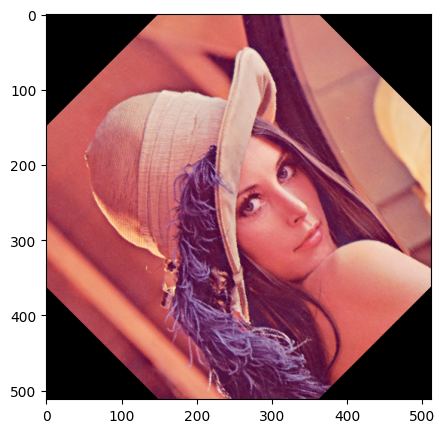

In [17]:
theta = 45
new_image = image.rotate(theta)
plot(new_image)

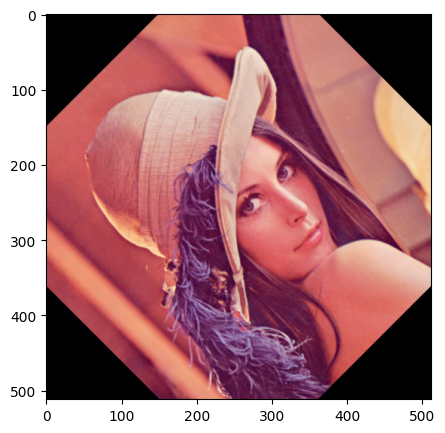

In [18]:
M = cv2.getRotationMatrix2D(
    center=(cols//2 - 1, rows//2 - 1), angle=theta, scale=1)
new_img = cv2.warpAffine(img, M, (cols, rows))
plot_cv2(new_img)

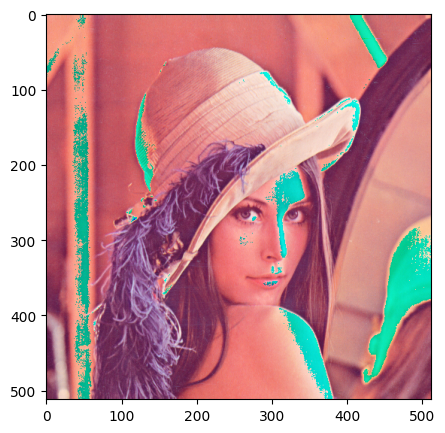

In [17]:
image = np.array(image)
new_image = image + 20
plot(new_image)

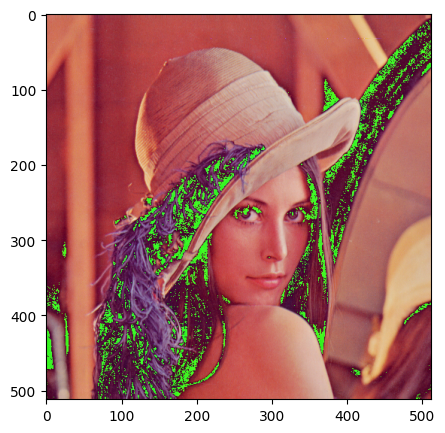

In [20]:
new_img = img - 20
plot_cv2(new_img)

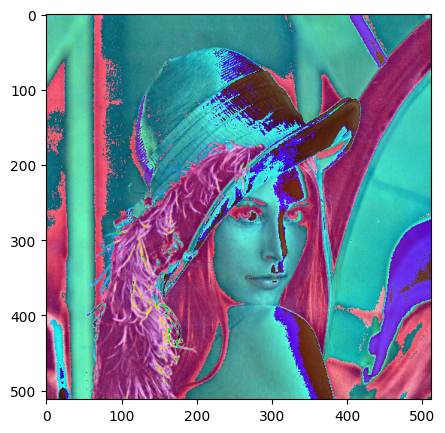

In [28]:
new_image = (1.5 * image).round().astype(np.uint8)
plot(new_image)

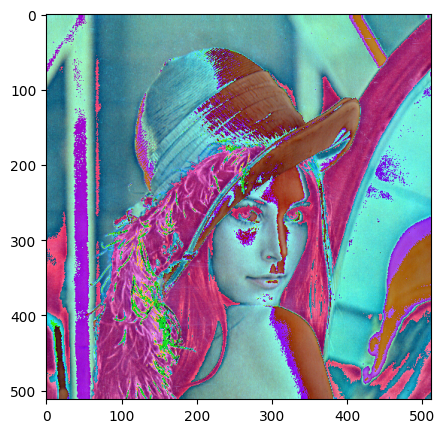

In [26]:
new_img = (1.75 * img).round().astype(np.uint8)
plot_cv2(new_img)

In [28]:
noise = np.random.normal(0, 20, (h, w, 3)).astype(np.uint8)
noise.shape

(512, 512, 3)

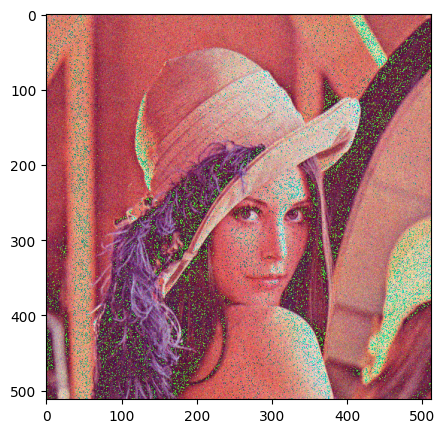

In [29]:
new_image = image + noise
plot(new_image)

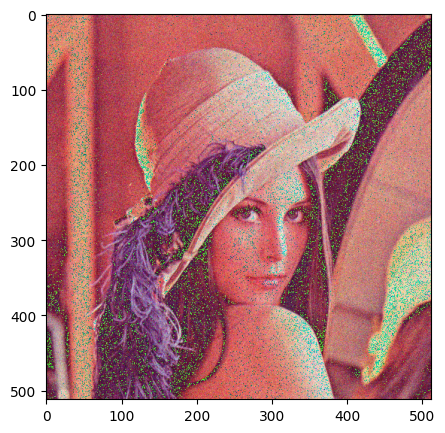

In [30]:
new_img = img - noise
plot_cv2(new_img)

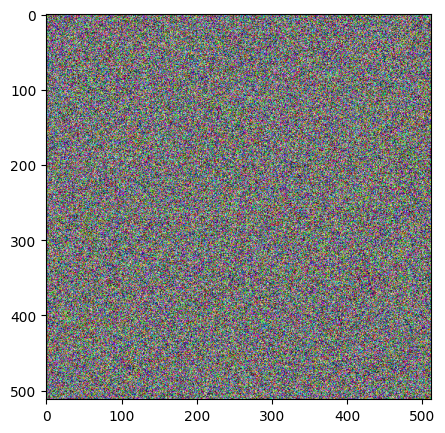

In [41]:
plot(image * noise)

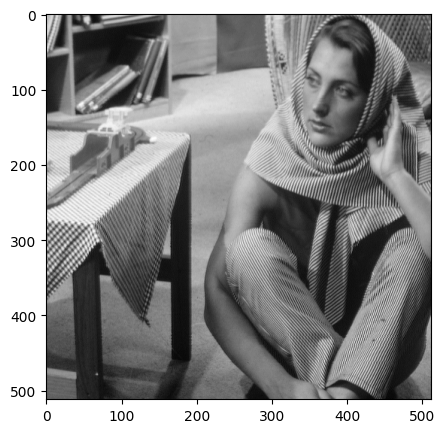

In [52]:
im_gray = Image.open(f'{IMG}/barbara.png')
im_gray = ImageOps.grayscale(im_gray)
im_gray = np.array(im_gray)
plot(im_gray, cmap='gray')

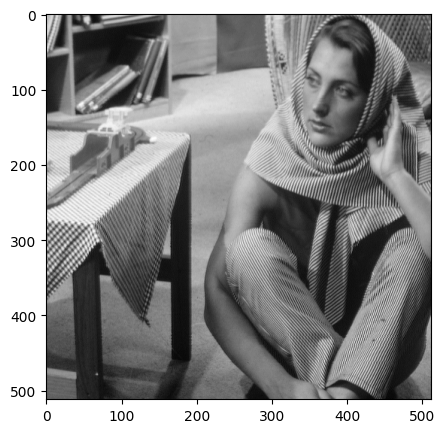

In [31]:
img = cv2.imread(f'{IMG}/barbara.png', cv2.IMREAD_GRAYSCALE)
plot(img, cmap='gray')

In [53]:
U, s, V = np.linalg.svd(im_gray, full_matrices=True)
im_gray.shape, s.shape

((512, 512), (512,))

In [54]:
S = np.zeros(im_gray.shape)
S[:image.shape[0], :image.shape[0]] = np.diag(s)

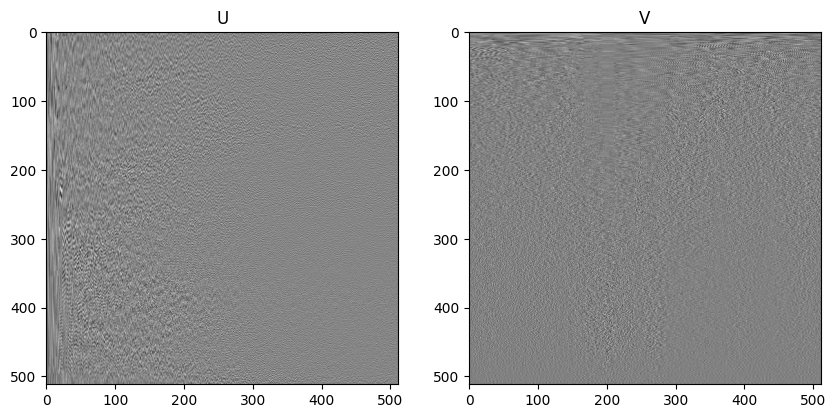

In [55]:
plot_image(U, V, 'U', 'V')

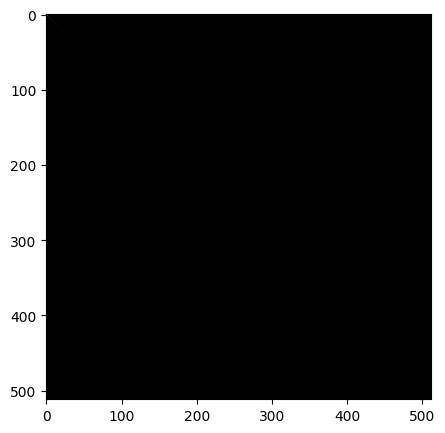

In [56]:
plot(S, cmap='gray')

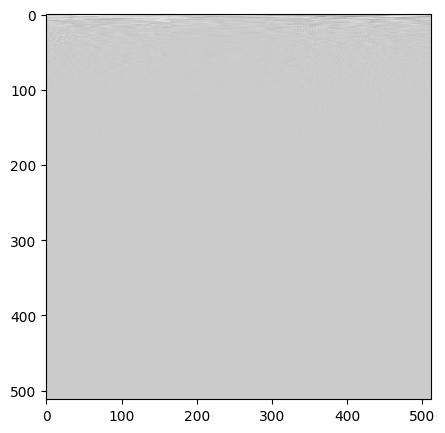

In [57]:
B = S.dot(V)
plot(B,cmap='gray')

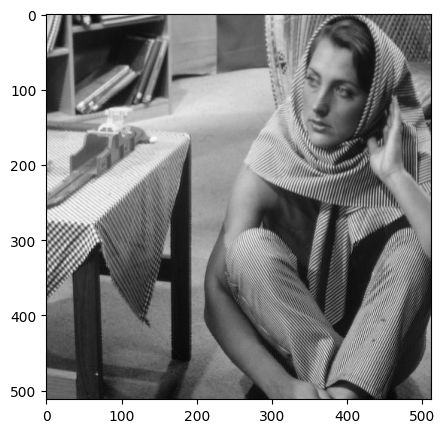

In [59]:
A = U.dot(B)
plot(A, cmap='gray')

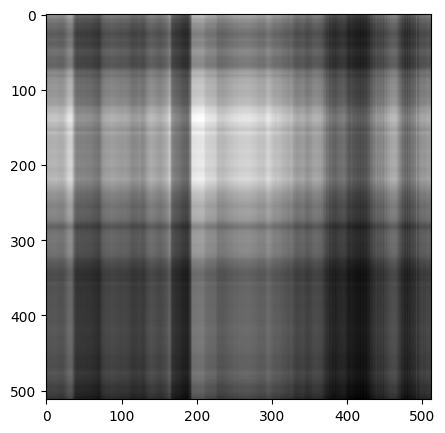

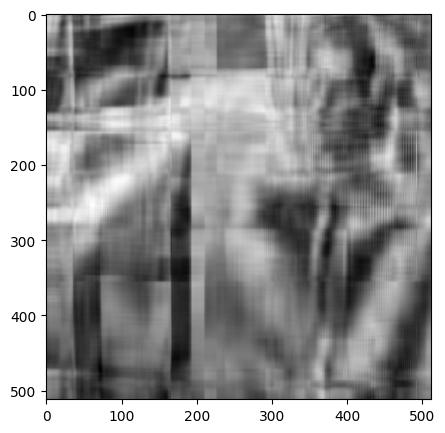

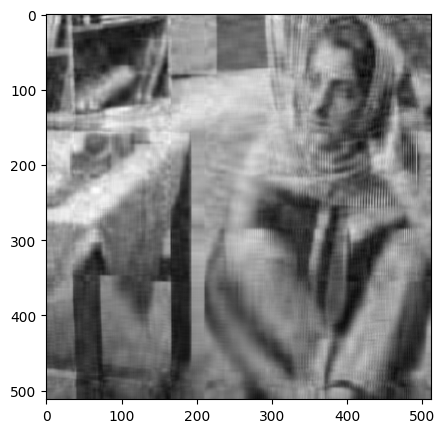

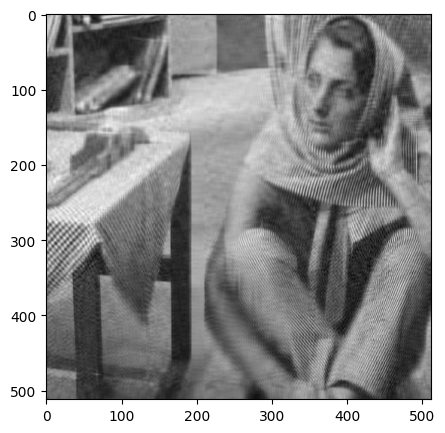

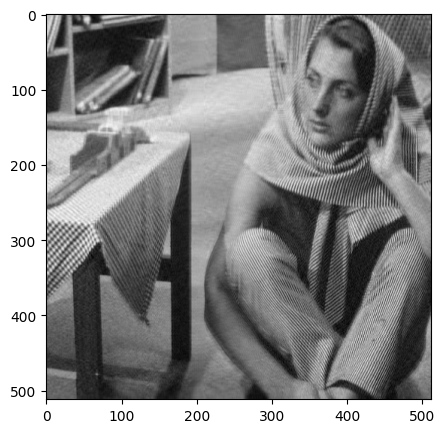

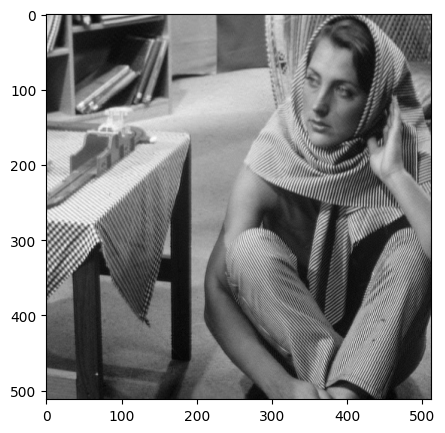

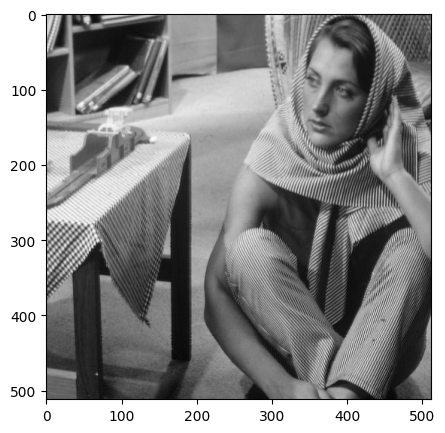

In [63]:
for n_component in [1, 10, 20, 50, 100, 200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plot(A, cmap='gray')